#  RESEARCH PROJECT B
Student: Mr Eloy Ruiz Donayre  
Supervisor: Prof Dr Achim Kehrein  

Reference Paper:  
> To sleep or not to sleep: the ecology of sleep in artificial organisms  
> Alberto Acerbi, Patrick McNamara and Charles L Nunn  
> https://doi.org/10.1186/1472-6785-8-10  

##   Experiment proposed by the paper
The paper proposes the creation of artifical individuals with genetic encoding of its circadian rythm. This genetic enconding corresponds to 24 genes that define the objective for each of the 24 hours of a day, said objectives could be `'to eat'`, `'to sleep'`, `'attend the need with lower satisfaction'`. The individual also has an food energy and sleep energy indicator.

Each individual is located in a different grid, each consisting of an rectangular array of cells with hard boundaries. Each cell of the grid can be empty or contain one of two kind of resource agents: `Sleep patches` or `Food patches`.

The agent roams in the grid with memory of its direction (every turn the direction can be modified by +15, 0, or -15 degrees), the roaming movement is of one cell by timestep with each timestep representing one minute. During this roaming movement, both energy and sleep energy are reduced.

If the objective of the current hour of the day coincides with the resource available in the cell, the agent won't move and the corresponding energy indicator of the agent will be increased.

For each experiment run, a population of a 100 individuals was created with random arrangement of genes and each individual was simulated for an ammount of timesteps representing 7 days. After this period, all the agents are ranked by the average of their sleep and food energies and the 20 fittest were selected as parents of the new population. Each parent produced 5 offsprings, and during (asexual) reproduction there was a chance (in the experiment, 5% chance or 1 mutation in average per every 20 genes) of occurring a mutation of each gene. Each experiment run consisted of a 100 generations in the reference paper.

###    Characterization of the environment
The grid of each individual was set with a square shape of `40 x 40 cells` and populated with 40 sleep and 40 food patches.

For the population process for each kind of resource a cluster of available locations is defined, and from each cluster a subgroup of location is randomly selected to put the required ammount of patches. To characterize the distance between clusters and the size of each cluster two variables are proposed: `intradistance` and `interdistance`. 

These are not exactly defined in the paper, so they were defined for this recreation in the following manner, taking in consideration the literature of simulation of automatas in grids (like Conway's Game of Life):
> `interdistance`: this is the Manhattan distance between the centers of the clusters.
> `intradistance`: this is the Manhattan size of the cluster, or the maximum Manhattan distance of any resource to the center of its cluster.

As the landscapes that evaluate the fitness of each individual try to be statistically similar in each simulation but have different distributions of food and sleep patches, this constitutes a situation of dynamic landscapes. There is no mention of this aspect on the reference paper.



### Energy dynamics
An important factor of the experiment is the energy lost in every roaming movement, and the energy acquired when a desired resource is reached. The paper mentions three important aspects about the resources:  

- After calibration experiments, a ratio of 3:1 between energy won and energy lost was stablished as adecuate.
- The sleeping patches do not deplete.
- The food patches deplete after a certain number of timesteps, and the energy provided by them decrease linearly with each timestep of exploitation.

There is no information about the exact ammounts of energy won and lost, so the following assumptions were made:

- The energy lost during roaming movement is of one unit of each kind.
- The energy won from sleep patches is of three units.
- The energy won from food patches is dependant on the `depletion timesteps` indicated on the experiment. To clarify: the energy obtained during the first exploitation timestep is higher than the energy obtained in the last one, but the total energy that can be obtained during the total existence of a food patch is the same that can be obtained from a sleep patch during the same ammount of timesteps. 

###    Fitness evaluation
A fitness value is calculated for each energy value of the individual through a sigmoid function: (1 + exp(-1/100 * energy) ) ^ -1. In this way, the fitness is bound between 0 and 1.  

The fitness of the individual corresponds to the average of the sleep fitness and the food fitness.

There is no discussion in the text about the appropriateness of the sigmoid function and in some point it is mentiones that in some experiment individuals with final fitness below 0.9 are discarded, in what seems a rather arbitrary decision.

##   Recreation of the Agent-Based Model for Fitness Evaluation
The recreation of the model was tried in pure C++ with the knowledge obtained from the module `Systems and organizations` but the handling of pointers proved too tedious.

Through navigation in Agent-Based Simulation websites, I discovered the Mesa framework that tries to implement standard features for quick implementation of simulations in Python (similar to Repast in Java).

For both situations, the approach is of Object Oriented Development (OOD) with each agent being an instance of a Class.

## Model setup

In [1]:
%matplotlib inline
# from jupyterthemes import jtplot
# jtplot.style()
# import seaborn as sns
# sns.set()

In [2]:
from simulation_modules.agents import Animal, FoodPatch, SleepPatch
from simulation_modules.model import SleepAnimals

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
a = np.random.choice(['eat' , 'sleep' , 'flex'] , 24)
a

array(['flex', 'sleep', 'flex', 'sleep', 'flex', 'eat', 'sleep', 'sleep',
       'flex', 'sleep', 'flex', 'sleep', 'sleep', 'sleep', 'flex', 'eat',
       'sleep', 'flex', 'eat', 'sleep', 'eat', 'sleep', 'sleep', 'eat'],
      dtype='<U5')

Creation of three grids with three values of `interdistance factors` (0 , 0.35 and 0.7). The `interdistance` is calculated as the `interdistance factor` times `maximum Manhattan distance in the grid` (this is equal to the width plus the height of the grid)

In [4]:
ground_1 = SleepAnimals(1, genome=a,  width=40, height=40, interdistance_factor=0)
ground_2 = SleepAnimals(1, genome=a,  width=40, height=40, interdistance_factor=0.35)
ground_3 = SleepAnimals(1, genome=a,  width=40, height=40, interdistance_factor=0.7)

In [5]:
# Interdistance or Manhattan distance between centers of Patches regions, 
# and intradistance or maximum Manhattan distance to center in each region
( ground_1.interdistance, ground_1.intradistance )
( ground_2.interdistance, ground_2.intradistance )
( ground_3.interdistance, ground_3.intradistance )

(56, 16)

### Available locations (or clusters) for Food and Sleep patches

For `ground 1` with interdistance = 0.

Food patches in green and sleep patches in lila.

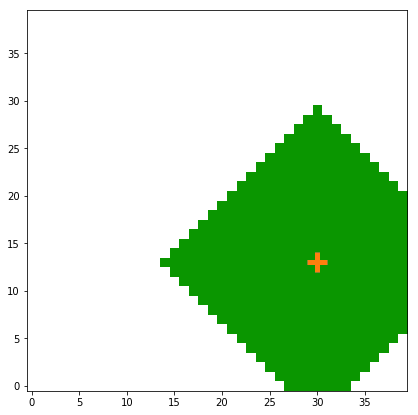

In [6]:
available_spots = ground_1.arrayRGB_clusters()
_ = plt.figure( figsize = (7, 7) )
_ = plt.imshow(np.swapaxes(available_spots,0,1), origin = 'lower')
_ = plt.plot(ground_1.fp_center_x, ground_1.fp_center_y, '+', mew=5, ms=20)
_ = plt.plot(ground_1.sp_center_x, ground_1.sp_center_y, '+', mew=5, ms=20)

In [7]:
# Coordinate of center of Food Patches Region
(ground_1.fp_center_x, ground_1.fp_center_y)
# Coordinate of center of Sleep Patches Region
(ground_1.sp_center_x, ground_1.sp_center_y)

(30, 13)

For `ground 2` with interdistance = 0.35

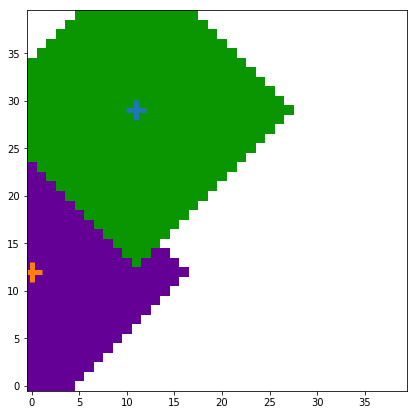

In [8]:
available_spots = ground_2.arrayRGB_clusters()
_ = plt.figure( figsize = (7, 7) )
_ = plt.imshow(np.swapaxes(available_spots,0,1), origin = 'lower')
_ = plt.plot(ground_2.fp_center_x, ground_2.fp_center_y, '+', mew=5, ms=20)
_ = plt.plot(ground_2.sp_center_x, ground_2.sp_center_y, '+', mew=5, ms=20)

For `ground 3` with interdistance = 0.7

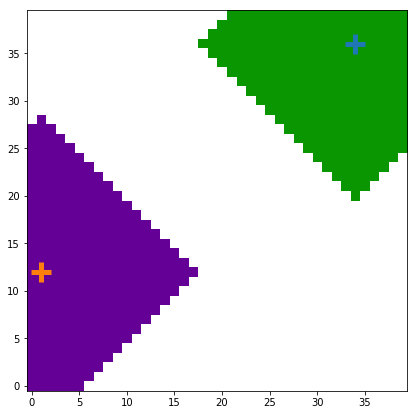

In [9]:
available_spots = ground_3.arrayRGB_clusters()
_ = plt.figure( figsize = (7, 7) )
_ = plt.imshow(np.swapaxes(available_spots,0,1), origin = 'lower')
_ = plt.plot(ground_3.fp_center_x, ground_3.fp_center_y, '+', mew=5, ms=20)
_ = plt.plot(ground_3.sp_center_x, ground_3.sp_center_y, '+', mew=5, ms=20)

### First population of food and sleep patches

For `ground 1` with interdistance = 0.

Food patches in green and sleep patches in lila. Individual in black.

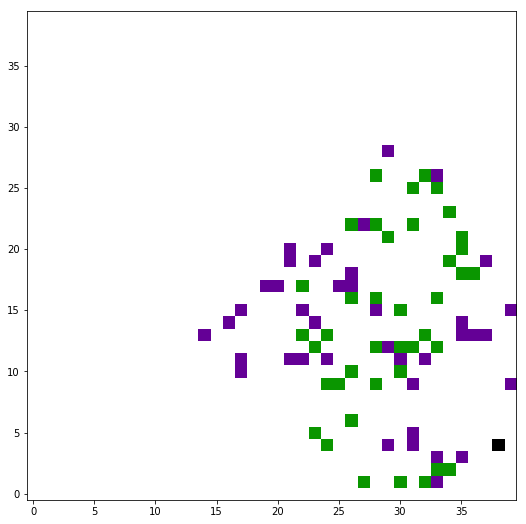

In [10]:
RGBdisplay = ground_1.arrayRGB_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(np.swapaxes(RGBdisplay,0,1), origin = 'lower')

For `ground 2` with interdistance = 0.35

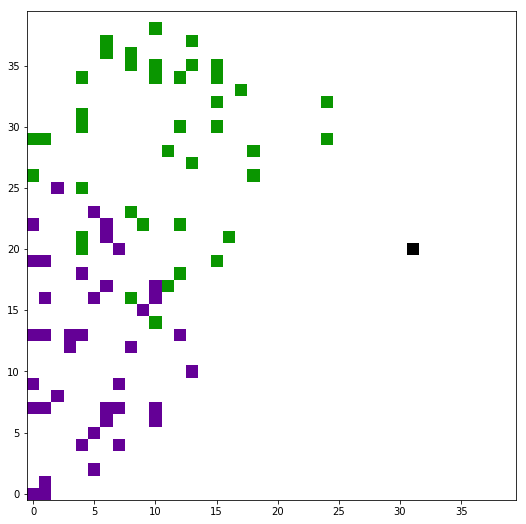

In [11]:
RGBdisplay = ground_2.arrayRGB_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(np.swapaxes(RGBdisplay,0,1), origin = 'lower')

For `ground 3` with interdistance = 0.7

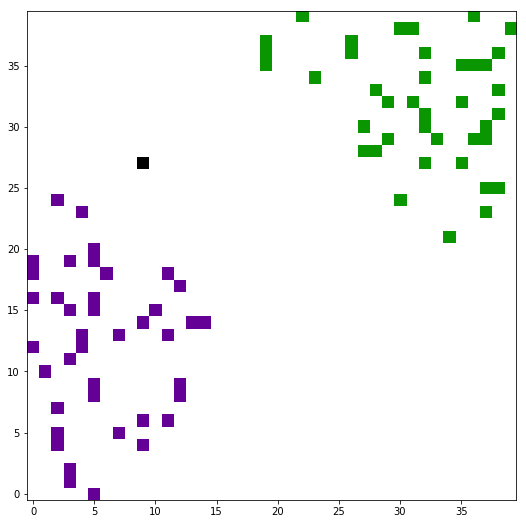

In [12]:
RGBdisplay = ground_3.arrayRGB_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(np.swapaxes(RGBdisplay,0,1), origin = 'lower')

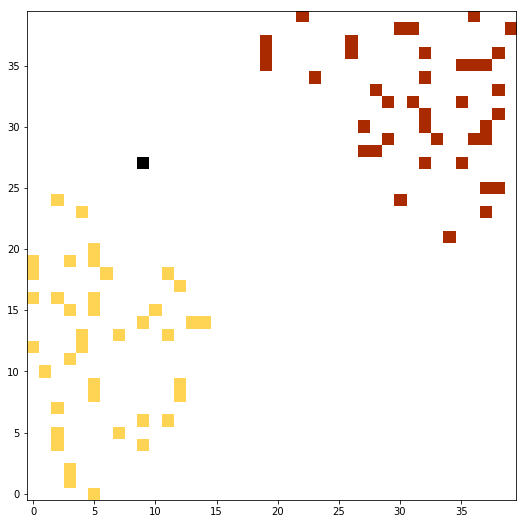

In [13]:
display2D = ground_3.array2D_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(display2D.T, 'afmhot_r', origin = 'lower')

## Testing movement of agent
In this section, for the `ground 3` (interdistance factor = 0.7) the movement of the agent is tested.

Five steps are executed and for each step it is shown:

- Timestep
- Position(x,y)
- Direction of movement (integer encoding, and translation)

In [14]:
ground_3.schedule.time , ground_3.schedule.agents[0].pos , 
ground_3.schedule.agents[0].direction , ground_3.schedule.agents[0].lookingto

(18, 'BOTTOM')

In [15]:
ground_3.step()
ground_3.schedule.time , ground_3.schedule.agents[0].pos , 
ground_3.schedule.agents[0].direction , ground_3.schedule.agents[0].lookingto

(19, 'BOTTOM')

In [16]:
ground_3.step()
ground_3.schedule.time , ground_3.schedule.agents[0].pos , 
ground_3.schedule.agents[0].direction , ground_3.schedule.agents[0].lookingto

(18, 'BOTTOM')

In [17]:
ground_3.step()
ground_3.schedule.time , ground_3.schedule.agents[0].pos , 
ground_3.schedule.agents[0].direction , ground_3.schedule.agents[0].lookingto

(17, 'BOTTOM')

In [18]:
ground_3.step()
ground_3.schedule.time , ground_3.schedule.agents[0].pos , 
ground_3.schedule.agents[0].direction , ground_3.schedule.agents[0].lookingto

(17, 'BOTTOM')

In [19]:
ground_3.step()
ground_3.schedule.time , ground_3.schedule.agents[0].pos , ground_3.schedule.agents[0].direction , ground_3.schedule.agents[0].lookingto

(5, (9, 22), 18, 'BOTTOM')

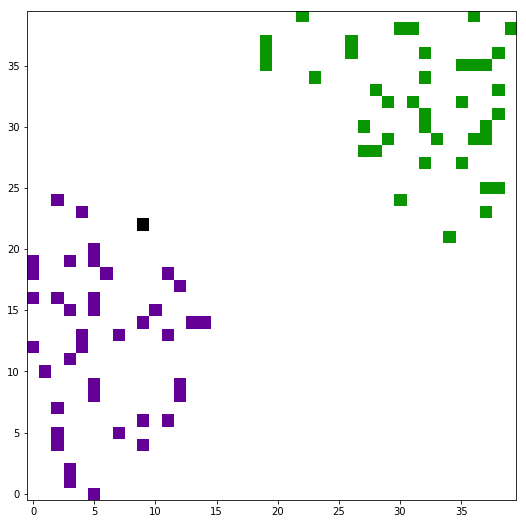

In [20]:
RGBdisplay = ground_3.arrayRGB_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(np.swapaxes(RGBdisplay,0,1), origin = 'lower')

## Testing data collection
Now, the simulation is run for 495 additional steps. Then, the grid is shown and the scatter plot of the Fitness.

In [21]:
for i in range(495):
    ground_3.step()

In [22]:
ground_3.schedule.time , ground_3.schedule.agents[0].pos , 
ground_3.schedule.agents[0].direction , ground_3.schedule.agents[0].lookingto

(20, 'BOTTOM-RIGHT')

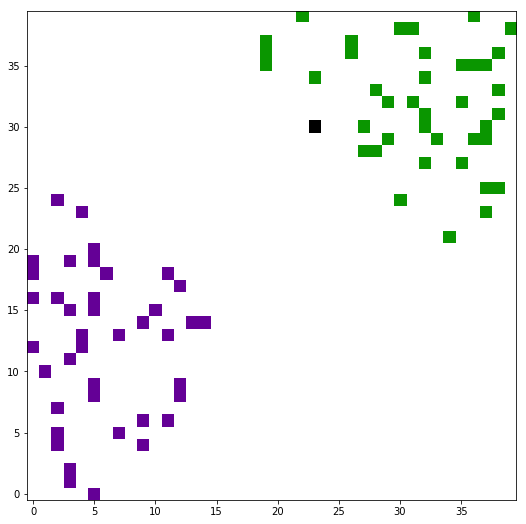

In [23]:
RGBdisplay = ground_3.arrayRGB_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(np.swapaxes(RGBdisplay,0,1), origin = 'lower')

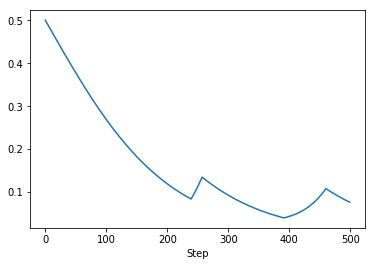

In [24]:
agents = ground_3.datacollector.get_agent_vars_dataframe()
Agent1_fitness = agents.xs(1, level="AgentID")
_ = Agent1_fitness.Fitness.plot()

Now, the simulation will be run for 3500, 3500, and 3000 steps, and the grid shown after each interval.

In [25]:
for i in range(3500):
    ground_3.step()

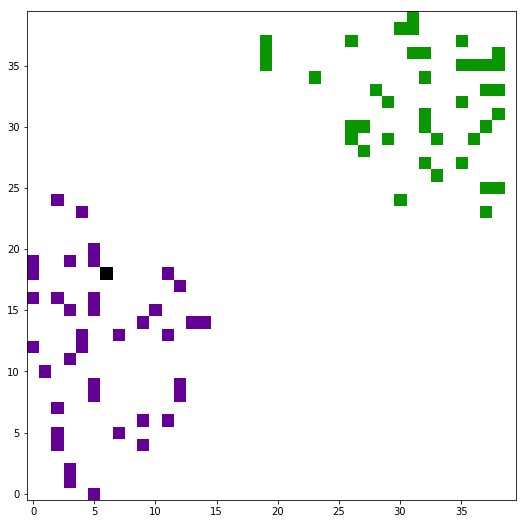

In [26]:
RGBdisplay = ground_3.arrayRGB_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(np.swapaxes(RGBdisplay,0,1), origin = 'lower')

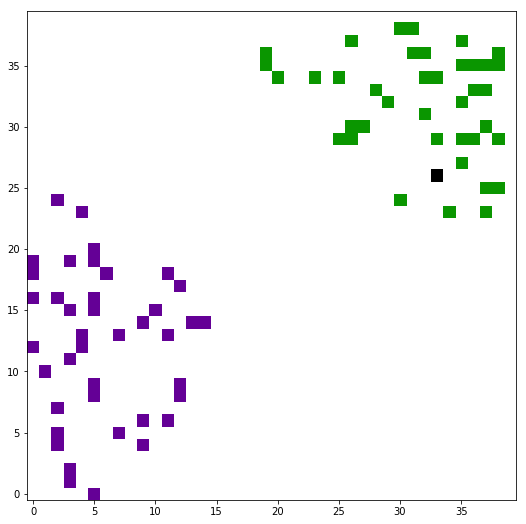

In [27]:
for i in range(3000):
    ground_3.step()
RGBdisplay = ground_3.arrayRGB_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(np.swapaxes(RGBdisplay,0,1), origin = 'lower')

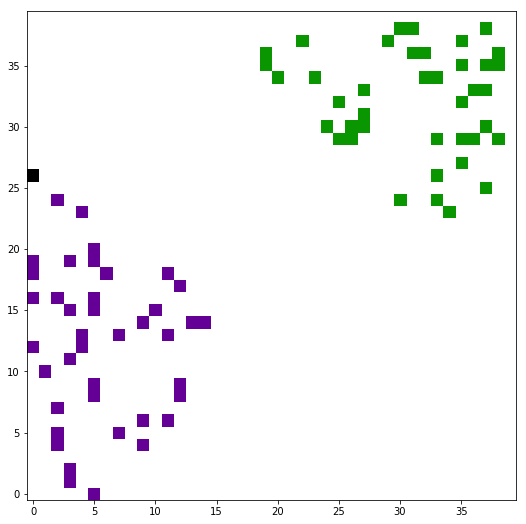

In [28]:
for i in range(3000):
    ground_3.step()
RGBdisplay = ground_3.arrayRGB_display()
_ = plt.figure( figsize = (9, 9) )
_ = plt.imshow(np.swapaxes(RGBdisplay,0,1), origin = 'lower')

From the automated data collectors, information has been captured about the agent for each timestep. As an example, it is shown:

- Mode of the individual (10 represents `feeding mode`, -10 is `sleeping mode`, and 0 is `roaming mode`)
- Fitness from food energy.
- Fitnes from sleep energy.
- Average fitness of the individual.

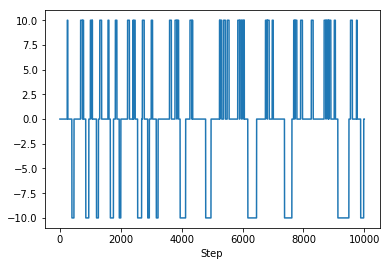

In [29]:
agents = ground_3.datacollector.get_agent_vars_dataframe()
agent1_data = agents.xs(1, level="AgentID")
_ = agent1_data.Mode.plot()

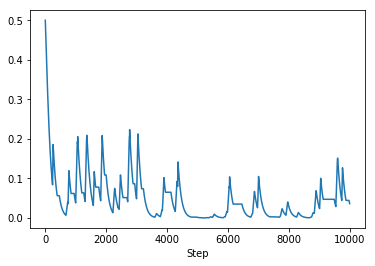

In [30]:
_ = agent1_data.Food_fitness.plot()

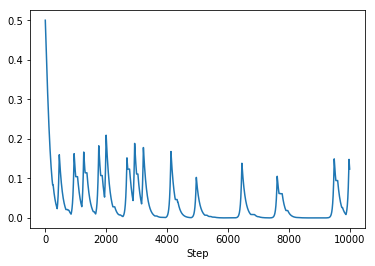

In [31]:
_ = agent1_data.Sleep_fitness.plot()

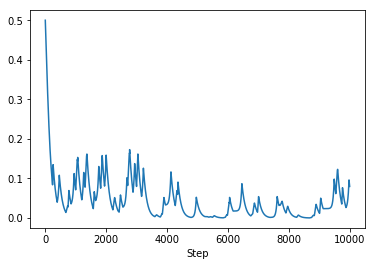

In [32]:
_ = agent1_data.Fitness.plot()